<a href="https://colab.research.google.com/github/SalehMehrabani/PyTorch-Deep-Learning/blob/main/NN4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow


In [2]:
import torch 
from torch import nn
import matplotlib.pyplot as plt

In [3]:
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## Data: Preparing and Loading


In [4]:
#Create Known parameter
weight = 0.7
bias = 0.3

#Create  dataset
start=0
end=1
step= 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

### Splitting Data into Training (Training and Validation set) and Test sets

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [7]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

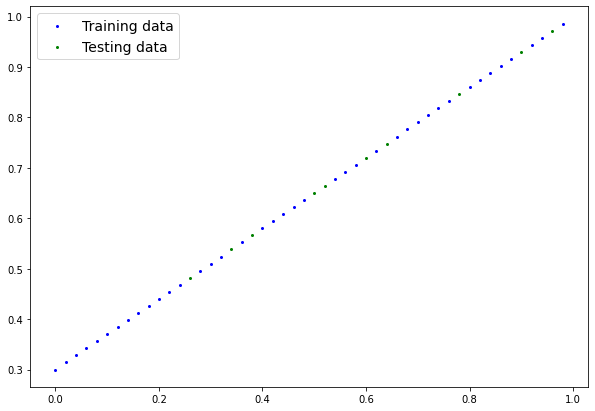

In [8]:
plot_predictions()

## Building PyTorch Model

In [9]:
#Create Linear Regression Model Class
#Almost Everything in PyTorch inherent from nn.Module
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weigths= nn.Parameter(torch.randn(1,
                                           dtype=torch.float),
                                           requires_grad=True)
    self.bias=nn.Parameter(torch.randn(1,
                                      dtype=torch.float),
                                      requires_grad=True)
    
    #FORWARD METHOD TO DEFINE THE COMPUTATIONAL IN THE MODULE
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weigths * x + self.bias

### PyTorch model building Essential

* `torch.nn` - contain all of the building for computational neural networks
* `torch.nn.Parameter` - what parameter should our model try and learn, often PyTorch layer from torch.nn will set these for us
* `torch.nn.Module` - The base class for all neural network modules, if you subclass it, You should overwrite `forward()`
* `torch.optim` - this where the optimizer in PyTorch live, they will help with gradient descent
* `def forward()` - All nn.Module subclasses require you to overwrite `forward()`, this method defines what happen in forward computation. 

In [10]:
# Checking the contents of our PyTorch model - .parameters()

#Create a random seed
torch.manual_seed(42)

#Create an instance of the model
myFirstModel= LinearRegressionModel()

#Check out our modle Parameter
list(myFirstModel.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
# List named parameter
myFirstModel.state_dict()

OrderedDict([('weigths', tensor([0.3367])), ('bias', tensor([0.1288]))])

## Making Prediction using `torch.inference_mode()`
When we pass data through our model, it's going to run it through the `forward()` method

In [12]:
#The torch.inference_mode does- is to turn off the keep tracking of the gradient
#It is make your code faster
with torch.inference_mode():
  y_preds=myFirstModel(X_test)

y_preds

#OR - inference node is preferred
#with torch.no_grad():
  #y_preds=myFirstModel(X_test)

tensor([[0.2163],
        [0.3914],
        [0.3308],
        [0.4318],
        [0.2433],
        [0.4520],
        [0.3039],
        [0.2972],
        [0.3443],
        [0.2568]])

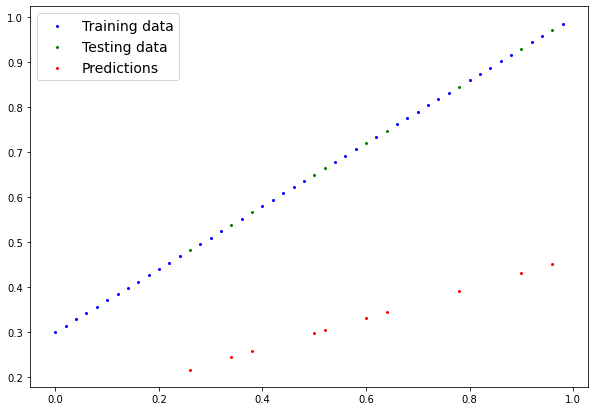

In [13]:
plot_predictions(predictions=y_preds)

## Train model

The main goal for training a model is to optimized the parameter in which can predicit new data with the least loss 

* **Cost (Loss) function**
One way to measure your model performance is, use loss function, which measure the distance between the real data label and predicted data label with hypothesis function line --> You can use built in PyTorch [Loss Function](https://pytorch.org/docs/stable/nn.html#loss-functions)

* **Optimizer:**
Takes into account the loss of a model and adjusts the model's parameters (e,g: weight & bias)


In [15]:
#Setup the loss function
loss_fn=nn.L1Loss()

#Setup an Optimizer (Stochastic Gradient Descent) #lr=learning rate
optimizer= torch.optim.SGD(params=myFirstModel.parameters(),
                           lr=0.01)